In [2]:
from  pathlib import Path
from PIL import Image, ImagePalette
import cv2
import numpy as np
from multiprocessing import Pool, cpu_count
from tqdm import tqdm 
from matplotlib import pyplot as plt
import json

In [3]:
cutouts = [ x for x in Path("/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts").rglob("*mask.png")]
len(cutouts)
species_info ="../../SemiF-AnnotationPipeline/data/semifield-utils/species_information/species_info.json"
with open(species_info) as f:
    data = json.load(f)
classes = data["species"].keys()

ids = [data["species"][clss]["class_id"] for clss in classes]
# data["species"]

In [3]:
def convert(imgpath):
    img = cv2.imread(str(imgpath))
    if img is not None:
        if img.max() == 255:
            img = np.where(img!= 0, 1, 0)
            cv2.imwrite(str(imgpath), img)

cpus = cpu_count() -3
with Pool(cpus) as p:
    p.map(convert, cutouts)
    p.close()
    p.join()

In [13]:
import random
time = "19-11-11"
date = "2022-11-06"
dir = Path(f"../data/exp_1/{date}/{time}")
savefig_dir = f"../assets/mask_examples/{date}/{time}"
Path(savefig_dir).mkdir(exist_ok=True, parents=True)
maskps = sorted(list(dir.glob("masks/*.png")))

imgps =  sorted(list(dir.glob("images/*.png")))
savdir = f"../data/exp_1/{date}/{time}/color_masks/"
Path(savdir).mkdir(exist_ok=True, parents=True)
# imgps = random.choice(imgs)
# img = Image.open(imgp)

In [5]:
for maskpath in maskps:
    img = cv2.cvtColor(cv2.imread(str(maskpath)), cv2.COLOR_BGR2RGB)
    uniqvals = np.unique(img)
    for clss in classes:
        for uval in uniqvals:
            class_id = data["species"][clss]["class_id"]
            rgb = data["species"][clss]["rgb"]
            if uval == class_id:
                img = np.where(img==uval, rgb, img)
    bgrimg = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)
    savepath = f"{savdir}/{Path(maskpath).name}"
    cv2.imwrite(savepath, bgrimg)
    print(f"Finished saving {Path(maskpath).name} with {len(uniqvals)} classes")

Finished saving 1977ee4a304b470c84d4482dd6d3c181.png with 5 classes
Finished saving 44f184d51b6b4aa9a86acdddfce3debc.png with 4 classes
Finished saving 4d439bdb16964f3497b88ae8ccc568f2.png with 4 classes
Finished saving 787622d576f74094b5bdbd085b8f6202.png with 4 classes
Finished saving 8f46595dad284b6b807a869e4777a825.png with 5 classes
Finished saving 9859dfd9f4b84d3c806ac0ada9f29ebc.png with 4 classes
Finished saving cf134a974fbd4a24adf5a2c32b7f67cb.png with 4 classes
Finished saving eefc506bdc4a4043b20d887257ce4760.png with 4 classes
Finished saving ffa2ed7e45bb4ecb846c1c5f0ea6bc74.png with 6 classes


In [12]:
color_masks = sorted(list(dir.glob("color_masks/*.png")))
for img, mask in (zip(imgps, color_masks)):
    print(img)
    print(mask)

../data/exp_1/2022-11-06/19-11-11/images/1977ee4a304b470c84d4482dd6d3c181.png
../data/exp_1/2022-11-06/19-11-11/color_masks/1977ee4a304b470c84d4482dd6d3c181.png
../data/exp_1/2022-11-06/19-11-11/images/44f184d51b6b4aa9a86acdddfce3debc.png
../data/exp_1/2022-11-06/19-11-11/color_masks/44f184d51b6b4aa9a86acdddfce3debc.png
../data/exp_1/2022-11-06/19-11-11/images/4d439bdb16964f3497b88ae8ccc568f2.png
../data/exp_1/2022-11-06/19-11-11/color_masks/4d439bdb16964f3497b88ae8ccc568f2.png
../data/exp_1/2022-11-06/19-11-11/images/57ab2c56dfe9471ca4bad31be78c3695.png
../data/exp_1/2022-11-06/19-11-11/color_masks/787622d576f74094b5bdbd085b8f6202.png
../data/exp_1/2022-11-06/19-11-11/images/787622d576f74094b5bdbd085b8f6202.png
../data/exp_1/2022-11-06/19-11-11/color_masks/8f46595dad284b6b807a869e4777a825.png
../data/exp_1/2022-11-06/19-11-11/images/8f46595dad284b6b807a869e4777a825.png
../data/exp_1/2022-11-06/19-11-11/color_masks/9859dfd9f4b84d3c806ac0ada9f29ebc.png
../data/exp_1/2022-11-06/19-11-11/

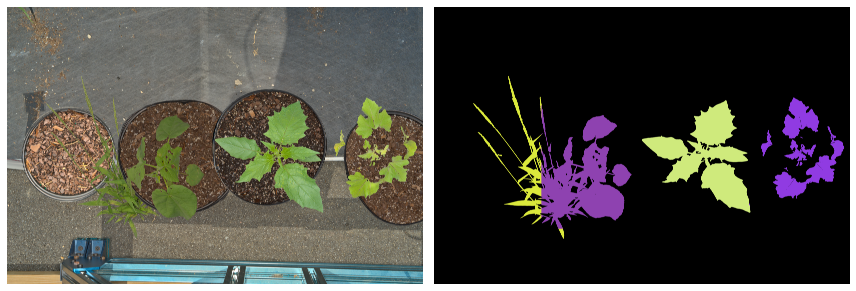

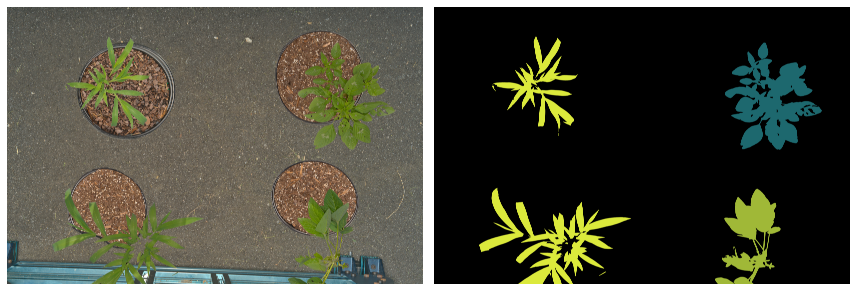

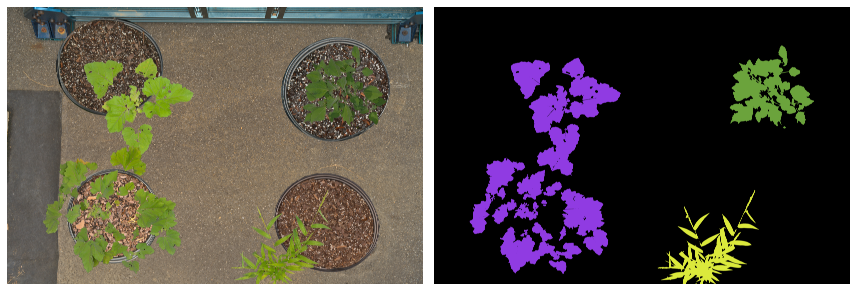

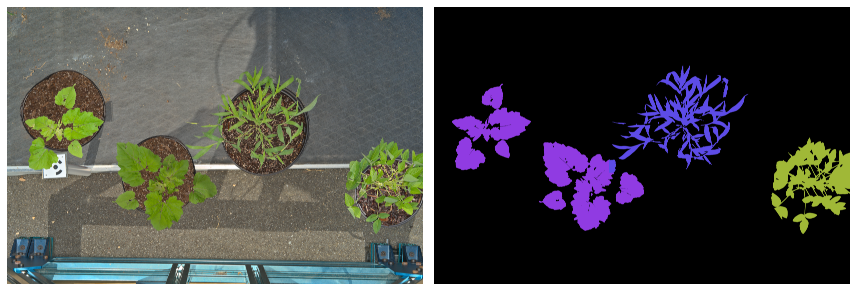

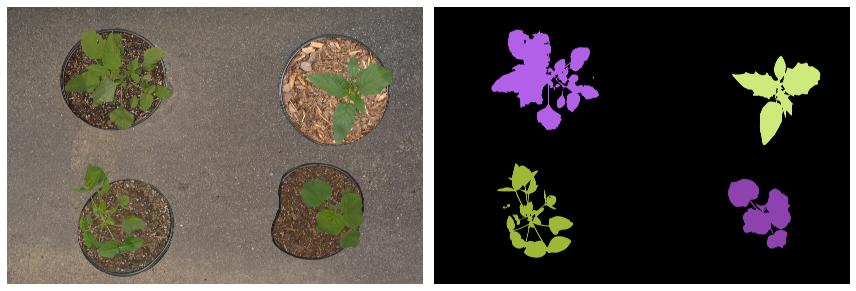

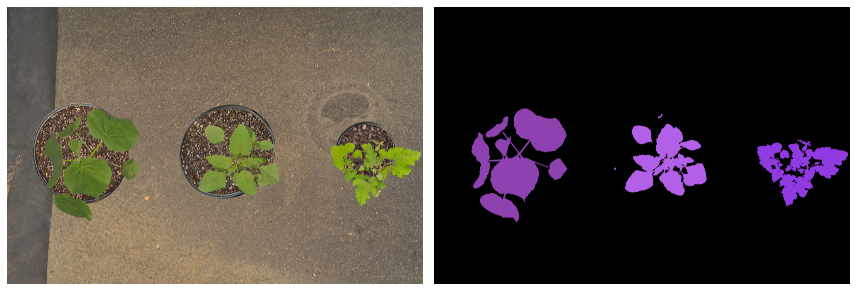

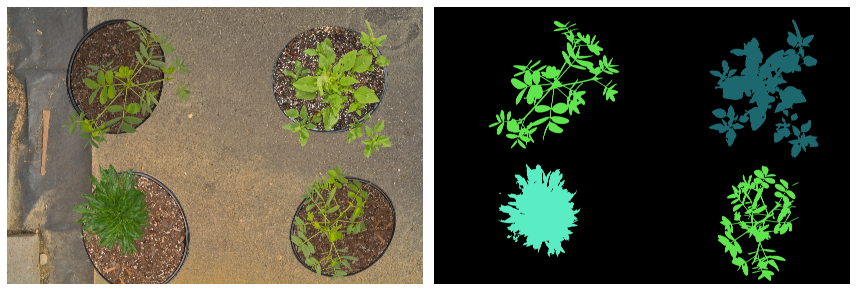

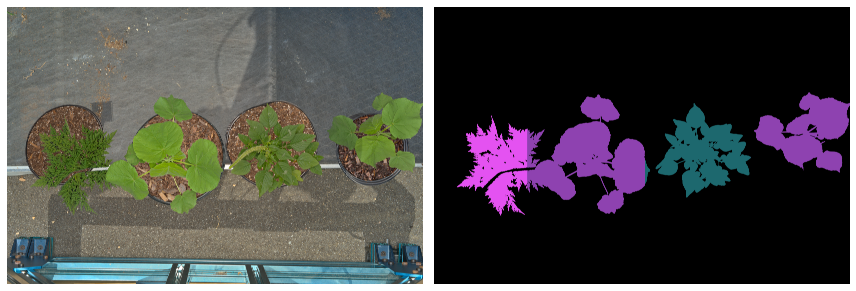

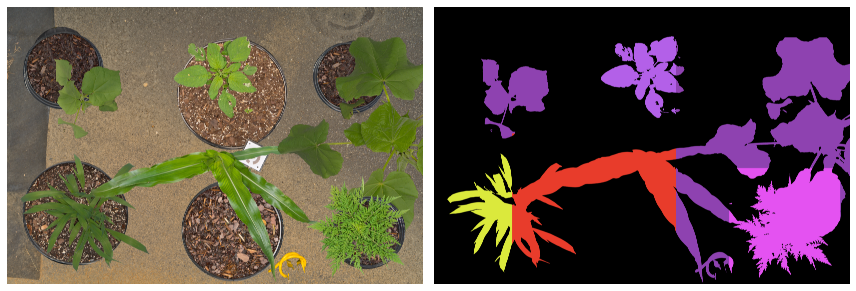

In [14]:
color_masks = sorted(list(dir.glob("color_masks/*.png")))
for img, mask in (zip(imgps, color_masks)):
    
    im = cv2.cvtColor(cv2.imread(str(img)), cv2.COLOR_RGB2BGR)
    ma = cv2.cvtColor(cv2.imread(str(mask)), cv2.COLOR_RGB2BGR)
    
    fig, ax = plt.subplots(1,2, figsize=(12,8))
    ax[0].imshow(im)
    ax[0].axis(False)
    ax[1].imshow(ma)
    ax[1].axis(False)
    plt.tight_layout()
    plt.savefig(f"{savefig_dir}/{Path(img).name}", dpi=300, transparent=True, bbox_inches="tight")
    plt.show()

In [7]:
pilimg = Image.fromarray(img)

In [11]:
pal =ImagePalette.ImagePalette().getdata(pilimg)

AttributeError: rawmode